  classification    avg_pnl  win_rate     avg_size  trade_count
0   Extreme Fear  34.537862  0.370607  5349.731843        21400
1  Extreme Greed  67.892861  0.464943  3112.251565        39992
2           Fear  54.290400  0.420768  7816.109931        61837
3          Greed  42.743559  0.384828  5736.884375        50303
4        Neutral  34.307718  0.396991  4782.732661        37686


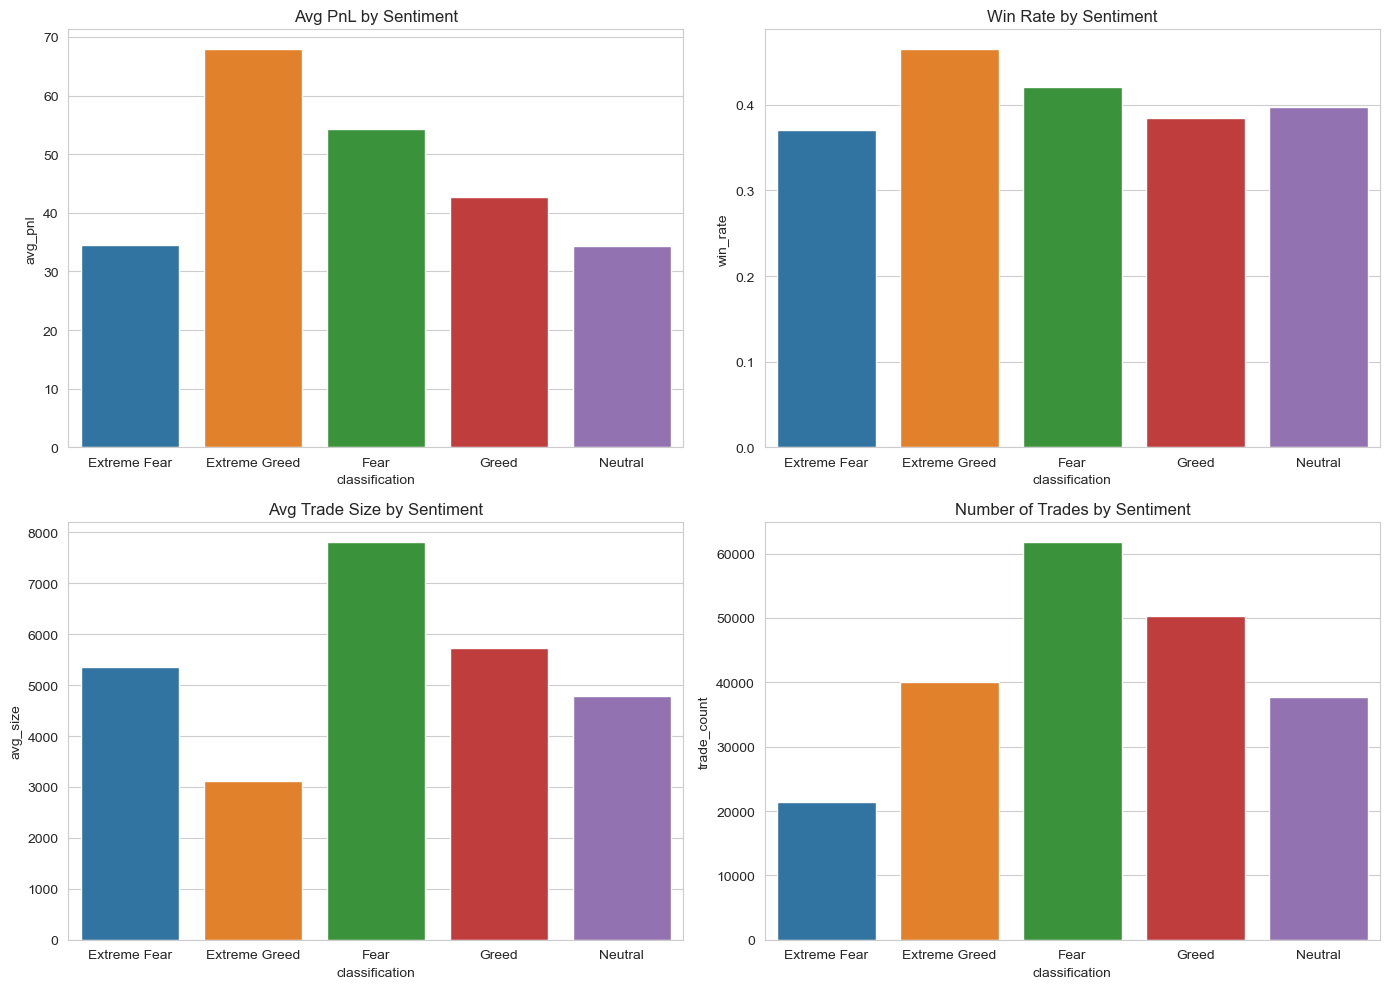

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fear = pd.read_csv("fear_greed_index.csv", parse_dates=["date"])
trades = pd.read_csv("historical_data.csv", parse_dates=["Timestamp IST"], dayfirst=True)


trades["date"] = trades["Timestamp IST"].dt.floor("D")
merged = trades.merge(fear[["date", "classification"]], on="date", how="left")
merged = merged.dropna(subset=["classification"])


group = merged.groupby("classification")
summary = group.agg(
    avg_pnl=("Closed PnL", "mean"),
    win_rate=("Closed PnL", lambda x: (x > 0).mean()),
    avg_size=("Size USD", "mean"),
    trade_count=("Closed PnL", "count")
).reset_index()
print(summary)

sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.barplot(data=summary, x="classification", y="avg_pnl", ax=axs[0,0]).set_title("Avg PnL by Sentiment")
sns.barplot(data=summary, x="classification", y="win_rate", ax=axs[0,1]).set_title("Win Rate by Sentiment")
sns.barplot(data=summary, x="classification", y="avg_size", ax=axs[1,0]).set_title("Avg Trade Size by Sentiment")
sns.barplot(data=summary, x="classification", y="trade_count", ax=axs[1,1]).set_title("Number of Trades by Sentiment")

plt.tight_layout()
plt.show()
